In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
data=pd.read_excel(r"C:\Users\Haytham ELKADHI\Desktop\Université Fisciano Salerne\Cours\Time series analyses\Project\StudApp.xlsx")

In [3]:
data.head()

Date  Number of application
0   January 2001                     57
1  February 2001                     42
2     March 2001                    111
3     April 2001                    234
4       May 2001                    198

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [6]:
indexedData = data.set_index(['Date'])

In [7]:
from datetime import datetime
indexedData.tail(5)

Number of application
Date                             
2023-10-01                    235
2023-11-01                    166
2023-12-01                    378
2024-01-01                    176
2024-02-01                    279

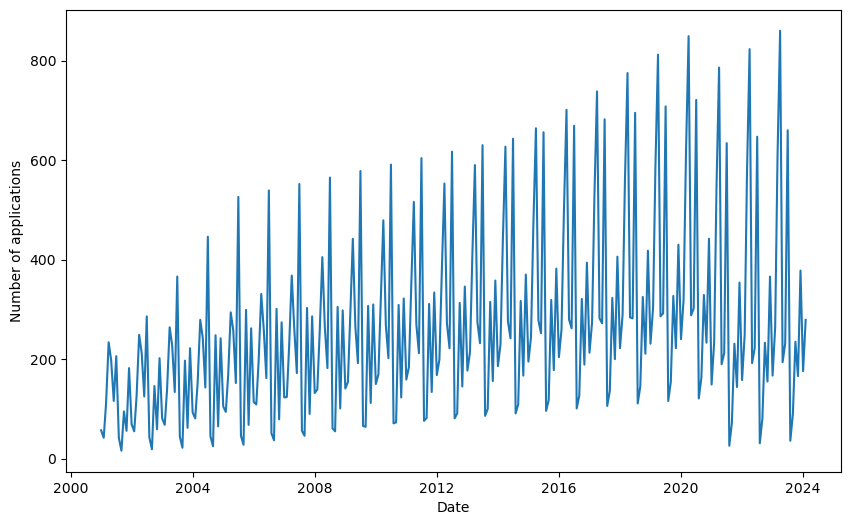

In [8]:
plt.xlabel("Date")
plt.ylabel("Number of applications")
plt.plot(indexedData)

In [9]:
rolmean = indexedData.rolling(window =12).mean()
rolstd = indexedData.rolling(window=12).std()
print (rolmean,rolstd)

            Number of application
Date                             
2001-01-01                    NaN
2001-02-01                    NaN
2001-03-01                    NaN
2001-04-01                    NaN
2001-05-01                    NaN
...                           ...
2023-10-01             322.166667
2023-11-01             323.083333
2023-12-01             324.083333
2024-01-01             324.833333
2024-02-01             326.083333

[278 rows x 1 columns]             Number of application
Date                             
2001-01-01                    NaN
2001-02-01                    NaN
2001-03-01                    NaN
2001-04-01                    NaN
2001-05-01                    NaN
...                           ...
2023-10-01             254.022130
2023-11-01             253.383094
2023-12-01             253.591460
2024-01-01             253.097478
2024-02-01             252.806595

[278 rows x 1 columns]


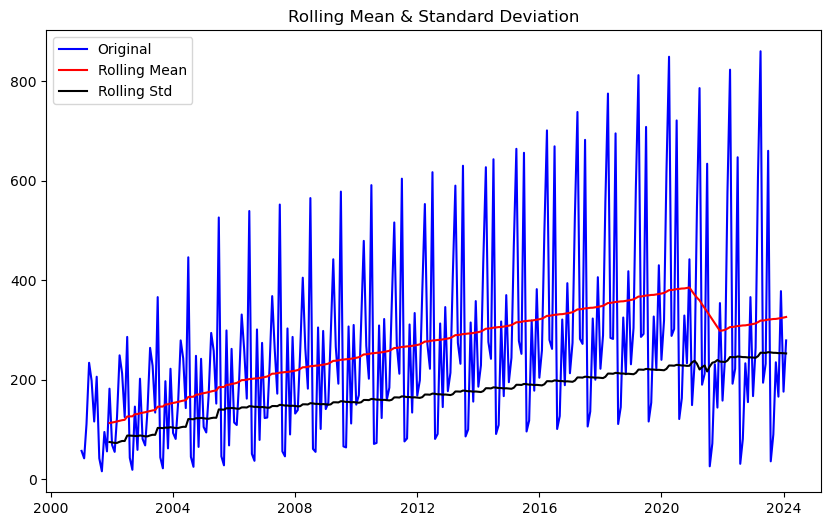

In [10]:
orig = plt.plot(indexedData, color='blue', label='Original')
mean =plt.plot(rolmean, color ='red',label='Rolling Mean')
std =plt.plot(rolstd, color ='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [11]:
#Perform Dickey-Fuller test : 
from statsmodels.tsa.stattools import adfuller

In [12]:
print('Result of Dickey-Fuller Test:')
dftest = adfuller(indexedData['Number of application'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

# Adding critical values to dfoutput
for key, value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value

print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                  -2.117825
p-value                          0.237408
#Lags Used                      15.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


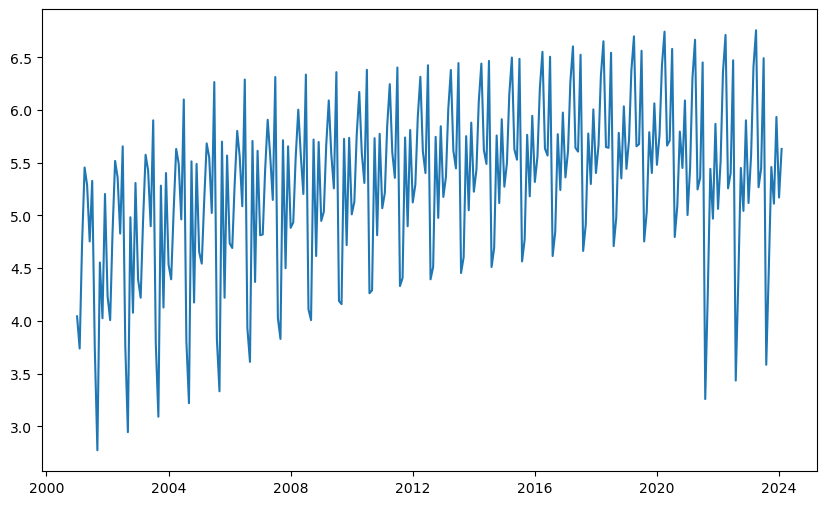

In [13]:
indexedData_logScale = np.log(indexedData)
plt.plot(indexedData_logScale)

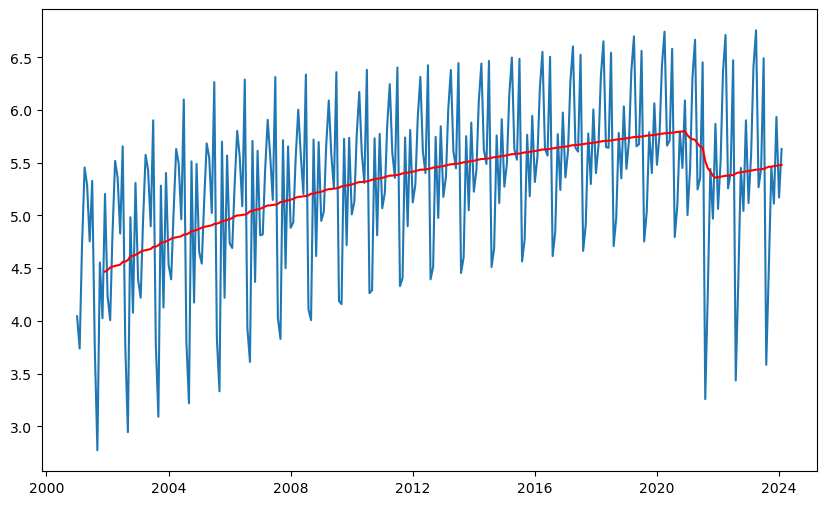

In [14]:
movingAverage =indexedData_logScale.rolling(window=12).mean()
movingStd =indexedData_logScale.rolling(window=12).std()
plt.plot(indexedData_logScale)
plt.plot(movingAverage, color='red')

In [15]:
datasetLogscaleMinusMovingAverage = indexedData_logScale - movingAverage 
datasetLogscaleMinusMovingAverage.head(12)
datasetLogscaleMinusMovingAverage.dropna(inplace=True)
datasetLogscaleMinusMovingAverage.head(10)

Number of application
Date                             
2001-12-01               0.736607
2002-01-01              -0.249215
2002-02-01              -0.498460
2002-03-01               0.312622
2002-04-01               0.996583
2002-05-01               0.834337
2002-06-01               0.295132
2002-07-01               1.095467
2002-08-01              -0.801286
2002-09-01              -1.632368

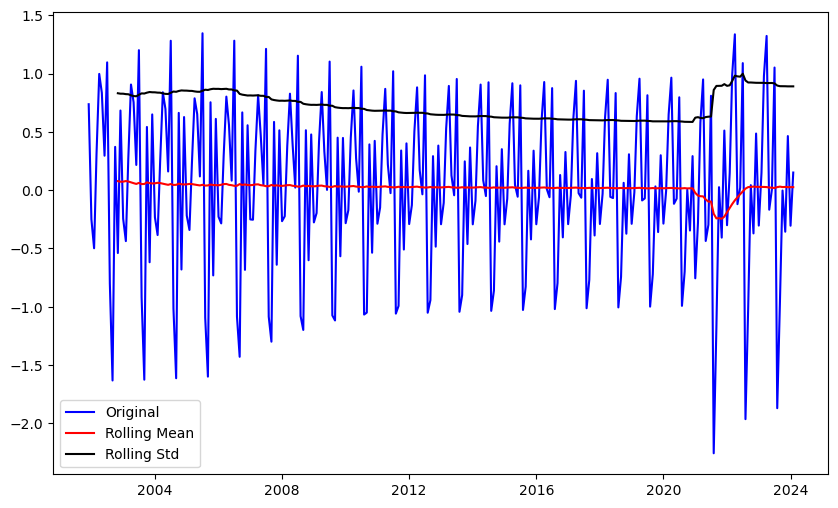

Result of Dickey-Fuller Test:
Test Statistic                  -3.670173
p-value                          0.004553
#Lags Used                      15.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [27]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend()
    plt.show()

    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])


    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value

    print(dfoutput)

test_stationarity(datasetLogscaleMinusMovingAverage['Number of application'])

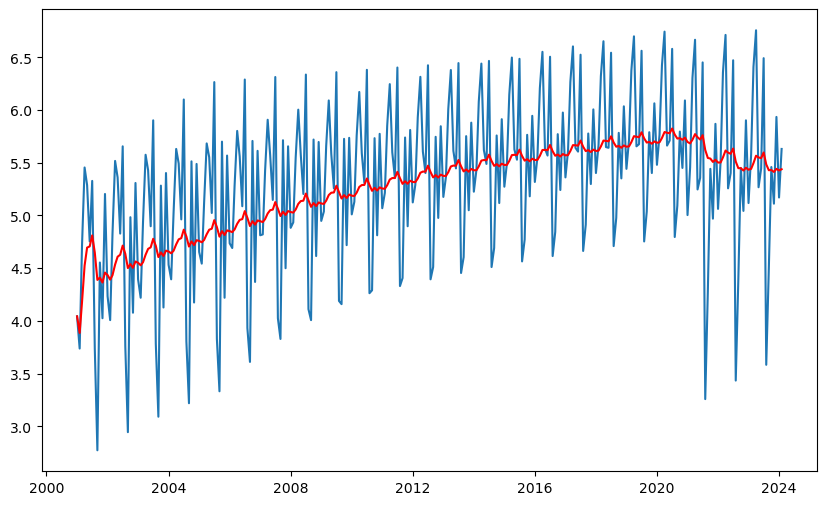

In [28]:
expDecWgtAv = indexedData_logScale.ewm(halflife = 12, min_periods=0, adjust=True).mean()
plt.plot(indexedData_logScale)
plt.plot(expDecWgtAv, color='red')

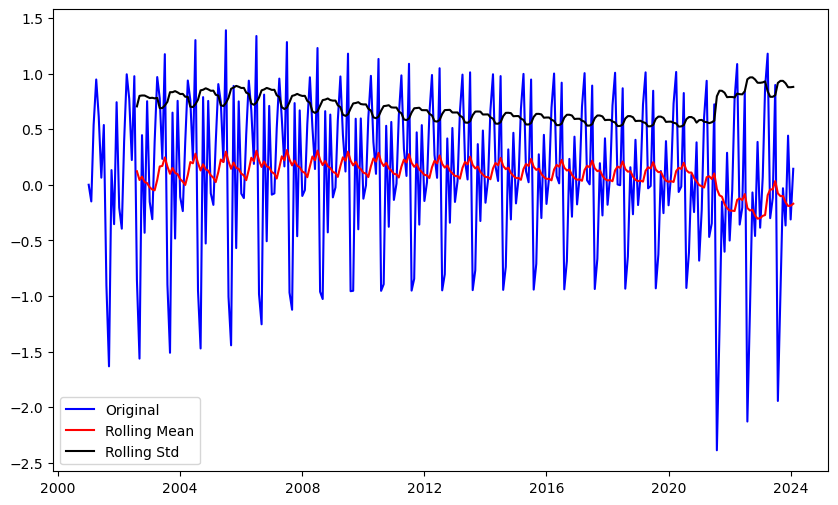

Result of Dickey-Fuller Test:
Test Statistic                  -1.757242
p-value                          0.401887
#Lags Used                      15.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [18]:
dataLogScMinusExpDecayAv = indexedData_logScale - expDecWgtAv
test_stationarity(dataLogScMinusExpDecayAv)

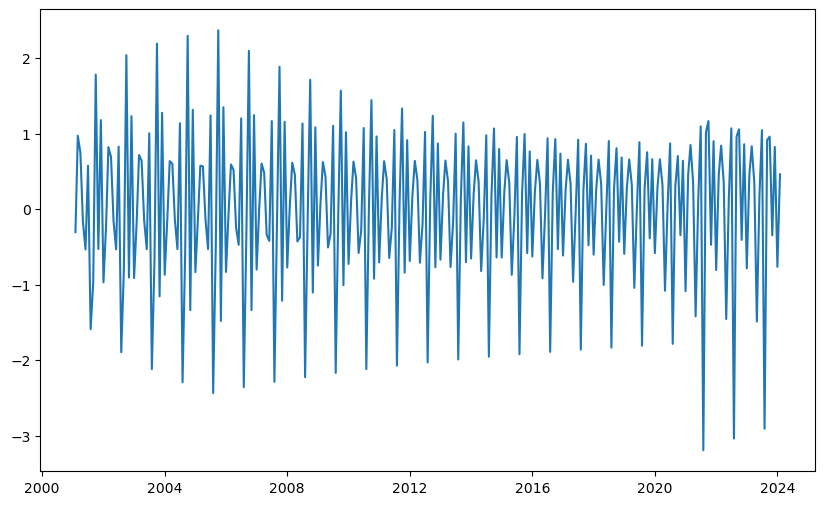

In [19]:
dataLogDiffShift = indexedData_logScale - indexedData_logScale.shift()
plt.plot(dataLogDiffShift)

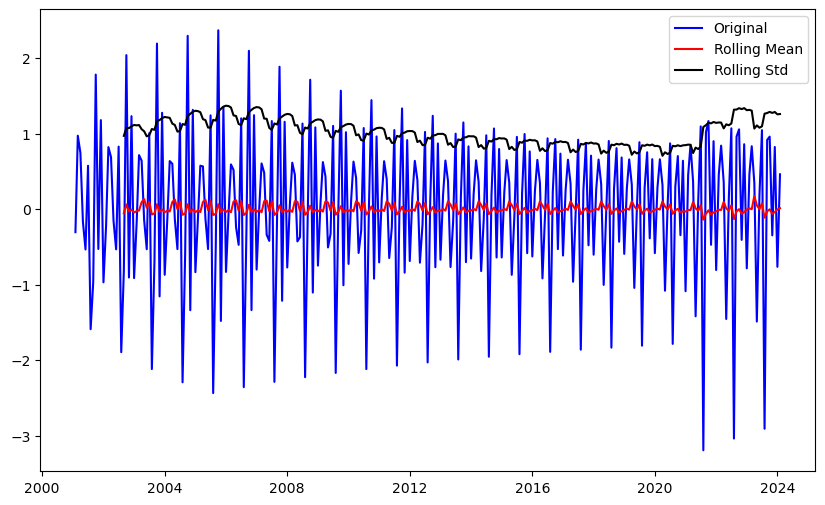

Result of Dickey-Fuller Test:
Test Statistic                  -4.329058
p-value                          0.000395
#Lags Used                      14.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [20]:
dataLogDiffShift.dropna(inplace=True)
test_stationarity(dataLogDiffShift)

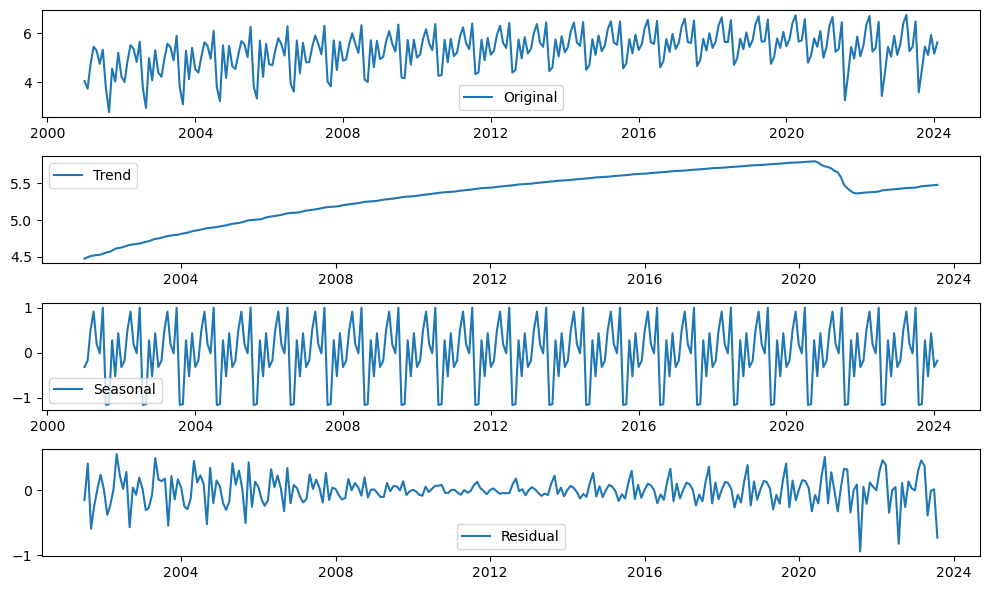

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(indexedData_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedData_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()



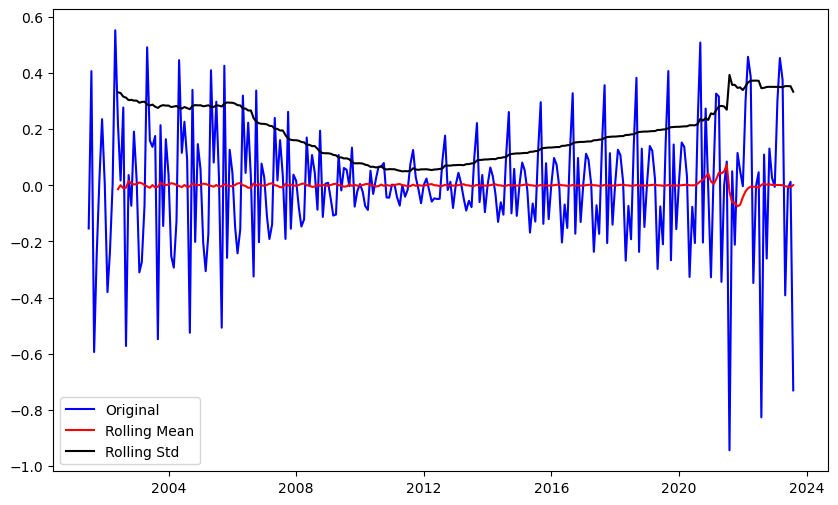

Result of Dickey-Fuller Test:
Test Statistic                -8.167152e+00
p-value                        8.820340e-13
#Lags Used                     1.400000e+01
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64


In [33]:
decomposedLogData = residual 
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData) 

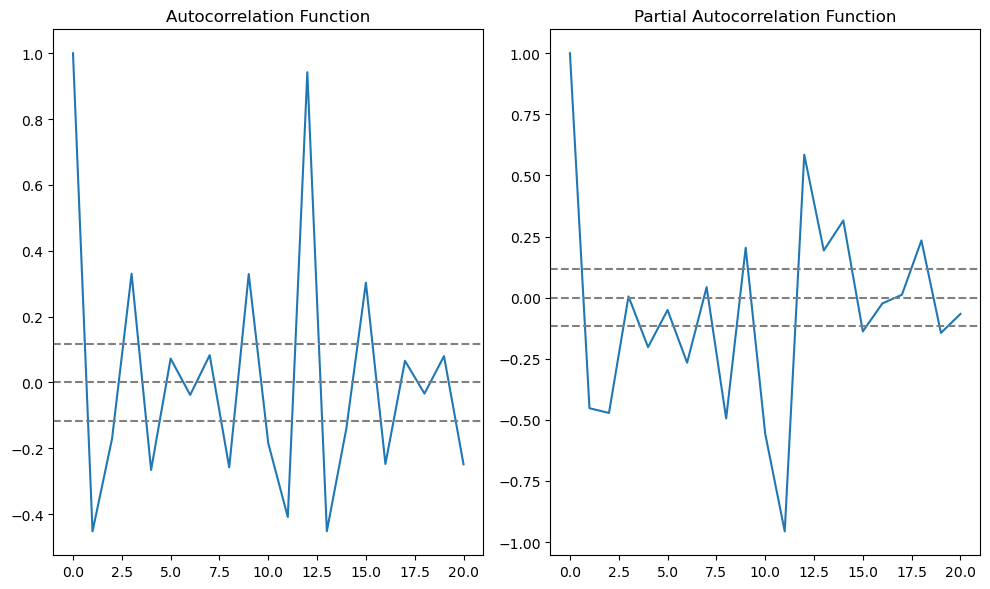

In [35]:
from statsmodels.tsa.stattools import acf,pacf 
lag_acf = acf(dataLogDiffShift,nlags = 20) 
lag_pacf = pacf(dataLogDiffShift,nlags = 20, method ='ols') 
#Plot ACF 
plt.subplot(121)
plt.plot(lag_acf) 
plt.axhline(y=0, linestyle ='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShift)), linestyle ='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShift)), linestyle ='--',color='grey')
plt.title('Autocorrelation Function')

#Plot PACF 
plt.subplot(122)
plt.plot(lag_pacf) 
plt.axhline(y=0, linestyle ='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShift)), linestyle ='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShift)), linestyle ='--',color='grey')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

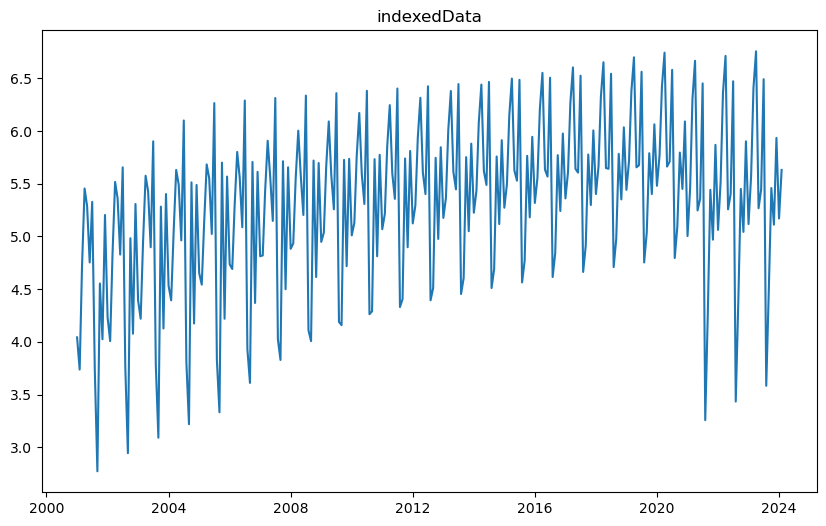

C:\Users\Haytham ELKADHI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Haytham ELKADHI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Haytham ELKADHI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


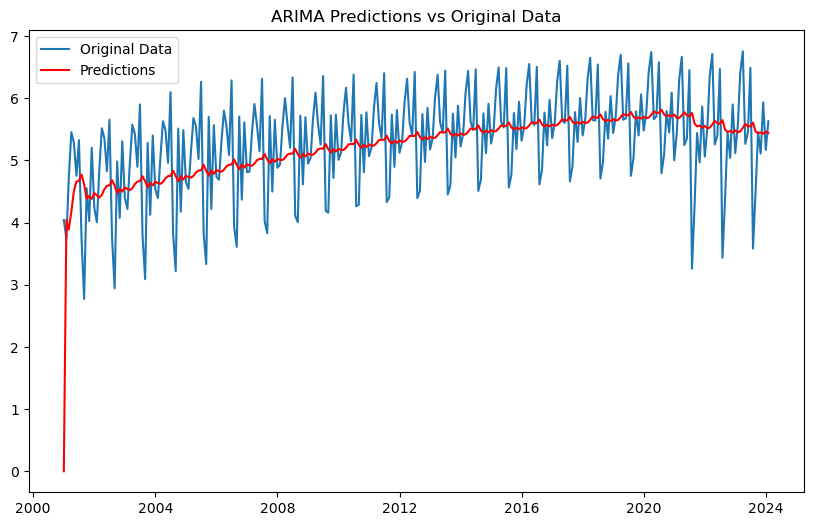

Mean Squared Error: 0.6005287790238923


In [69]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Plot the original data
plt.plot(indexedData_logScale)
plt.title('indexedData')
plt.show()

# Fit ARIMA model
model = ARIMA(indexedData_logScale, order=(1, 1, 1))
results = model.fit()

# Make predictions
predictions = results.predict(start=0, end=len(indexedData_logScale)-1)

# Plot the original data and predictions
plt.plot(indexedData_logScale, label='Original Data')
plt.plot(predictions, label='Predictions', color='red')
plt.title('ARIMA Predictions vs Original Data')
plt.legend()
plt.show()

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(indexedData_logScale, predictions)
print(f'Mean Squared Error: {mse}')


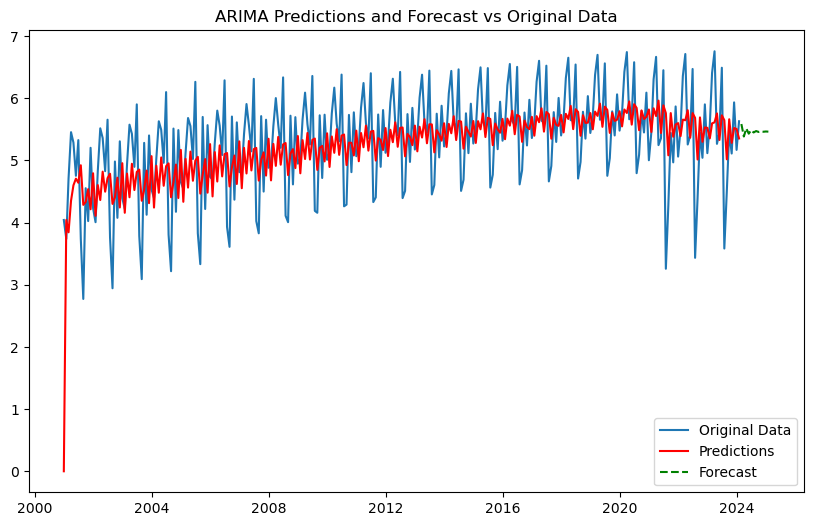

In [66]:
forecast_periods = 12  
forecast = results.forecast(steps=forecast_periods)

# Plot the original data and predictions
plt.plot(indexedData_logScale, label='Original Data')
plt.plot(predictions, label='Predictions', color='red')
plt.plot(forecast, label='Forecast', color='green', linestyle='--')
plt.title('ARIMA Predictions and Forecast vs Original Data')
plt.legend()
plt.show()
